In [1]:
import numpy as np
import matplotlib.pyplot as plt

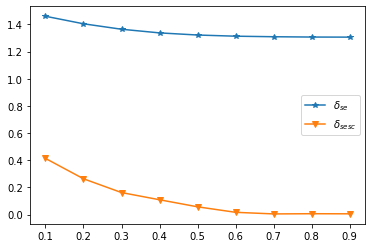

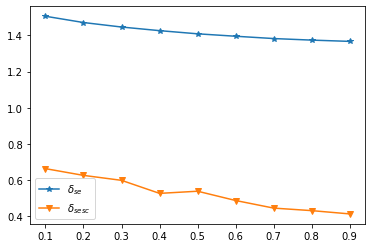

In [2]:
# ws网络
p = np.linspace(0.1, 0.9, 9)
delta_se =  [1.45954406,1.40405284,1.36390354,1.3370599,1.32133152,1.31275222, 
             1.30876944,1.30648638,1.3058338 ]
delta_sesc = [0.41368849, 0.2637132, 0.16219528, 0.10917795, 0.05726326, 0.01679599, 
              0.00509157, 0.00653291, 0.00580304]

plt.plot(p, delta_se, marker='*', label=r'$\delta_{se}$')
plt.plot(p, delta_sesc, marker='v', label=r'$\delta_{sesc}$')
plt.legend()
plt.show()

# nw网络
delta_se = [1.50602262, 1.4713206,  1.44642876, 1.42641352, 1.40889305, 1.39549043, 
            1.3827162,  1.37409661, 1.36708911]
delta_sesc = [0.66376858, 0.62647926, 0.59908696, 0.52698881, 0.53893197, 0.48757712, 
              0.44558879, 0.43162205, 0.41346978]
plt.plot(p, delta_se, marker='*', label=r'$\delta_{se}$')
plt.plot(p, delta_sesc, marker='v', label=r'$\delta_{sesc}$')
plt.legend()
plt.show()

In [3]:
import os
import scipy.io
from SPM import SPM
from train_test_split import DivideNet
import pandas as pd
import random

def getMaxEG(n, m):
    if 2 * m >= n:
        max_EG = 2*m / n + np.sqrt((n-1)*(2*m-(2*m/n)**2))
    else:
        max_EG = np.sqrt(2*m*n)
    return max_EG

files = os.listdir('Code and Data for NC paper/Data')
row_name = [file[:-4] for file in files]
df_se = pd.DataFrame(columns=('0.1', '0.3', '0.5', '0.8'))
df_sesc = pd.DataFrame(columns=('0.1', '0.3', '0.5', '0.8'))

for id in [0, 1, 5, 7, 10, 11]:
    print(id, files[id])
    data = scipy.io.loadmat('Code and Data for NC paper/Data/' + files[id])
    delta_se_lst = []
    delta_sesc_lst = []
    for p in [0.05, 0.15, 0.25, 0.45]:
        delta_se = 0
        sigma_c = 0
        for k in range(10):
            A = data['A'].todense()
            one_index = np.argwhere(np.triu(A) == 1).tolist()
            sampled = random.sample(one_index, int(p*len(one_index)))
            for s in sampled:
                A[s[0], s[1]] = 0
                A[s[1], s[0]] = 0
            n = A.shape[0]
            m = np.sum(np.triu(A))
            eigvals = np.linalg.eigvals(A)
            E = np.sum(abs(eigvals))
            delta_se += getMaxEG(n, m) / E
            
            train, test = DivideNet(A, 0.1)
            A_R, A_T = DivideNet(train, 0.1)
            sigma_c += SPM(train, test, A_R, A_T)
        delta_se_lst.append(delta_se / 10)
        delta_sesc_lst.append((delta_se / 10) * (sigma_c / 10))
    df_se.loc[files[id], :] = delta_se_lst
    df_sesc.loc[files[id], :] = delta_sesc_lst
    
print(df_se)
print(df_sesc)

0 Bio-CE-GT.mat
1 Celegans.mat
5 Facebook.mat
7 PB.mat
10 Tech-routers.mat
11 USAir.mat
                      0.1      0.3      0.5      0.8
Bio-CE-GT.mat     1.73449  1.72746  1.72014  1.73452
Celegans.mat      1.41595  1.39948   1.3909  1.37453
Facebook.mat      1.58394  1.53114  1.48624  1.41834
PB.mat            1.79606   1.7727  1.75564  1.72393
Tech-routers.mat  1.69438  1.68505  1.69099  1.70002
USAir.mat         1.89611  1.85074  1.82985   1.7842
                       0.1       0.3       0.5        0.8
Bio-CE-GT.mat      0.14859  0.132543   0.10335  0.0545692
Celegans.mat        0.1527  0.126107  0.069113  0.0512536
Facebook.mat      0.429161  0.306485  0.220745   0.110377
PB.mat            0.323584  0.248927  0.211153   0.119118
Tech-routers.mat  0.306872  0.194245  0.123847  0.0144782
USAir.mat         0.455255  0.316683  0.262393   0.109797
